#**NLP ASSIGNMENT 2**

### Names and PRN of Team member
- Mayur Shirsat     :  23070243046     
- Pratik Ghoderao   :  23070243018
- Niraj Gunjal      :  23070243019

In [21]:
#Importing Basic Libraries
import re
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from datetime import datetime
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')

# Removing Warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Loading the data
data = pd.read_csv('tweets.csv')
data.head()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
0,0,2023-03-29 15:42:36+00:00,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0
1,1,2023-03-29 15:42:05+00:00,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0
2,2,2023-03-29 15:34:29+00:00,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0
3,3,2023-03-29 15:31:43+00:00,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0
4,4,2023-03-29 15:26:48+00:00,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0


In [3]:
#Checking any null values
data.isnull().sum()

,0
Unnamed: 0,0
Date,0
User,0
Tweet,1
Likes,2
Retweets,2


In [4]:
#droping NA values
data.dropna(inplace =True)

In [5]:
#checking duplicates
data.duplicated().sum()

0

In [6]:
#checking the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49999 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49999 non-null  object 
 1   Date        49999 non-null  object 
 2   User        49999 non-null  object 
 3   Tweet       49999 non-null  object 
 4   Likes       49999 non-null  float64
 5   Retweets    49999 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.7+ MB


In [7]:
#chceking uniqe values
data.nunique()

,0
Unnamed: 0,49999
Date,49820
User,35108
Tweet,49568
Likes,598
Retweets,312


In [8]:
#getting all numeric columns
numeric_col = []
for column in data.columns:
    if data[column].dtype != 'object':
        numeric_col.append(column)
print(numeric_col)

['Likes', 'Retweets']


In [9]:
# Getting all categorical columns
categorical_col = []
for column in data.columns:
  if data[column].dtype != 'int64' and data[column].dtype != 'float64':
    categorical_col.append(column)
print(categorical_col)

['Unnamed: 0', 'Date', 'User', 'Tweet']


In [10]:
data.shape

(49999, 6)

In [13]:
# Fill NaN values in the Tweet column with empty strings
data['Tweet'] = data['Tweet'].fillna('')

In [14]:
# Define a function to clean tweets
def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # Remove URLs
    tweet = re.sub(r'@\w+|#\w+', '', tweet)  # Remove mentions and hashtags
    tweet = re.sub(r"[^a-zA-Z\s]", '', tweet)  # Remove special characters and numbers
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # Remove extra whitespace
    return tweet

In [15]:
# Apply the cleaning function
data['Cleaned_Tweet'] = data['Tweet'].apply(clean_tweet)
data.to_csv('cleaned_tweets.csv', index=False)


### **Sentiment Analysis Using VADER**

In [16]:
nltk.download('vader_lexicon') # Download the VADER lexicon
sia = SentimentIntensityAnalyzer() # Initialize VADER


# Calculate sentiment scores
data['Sentiment_Score'] = data['Cleaned_Tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment based on compound score
data['Sentiment'] = data['Sentiment_Score'].apply(
    lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral'
)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##### **Summary:**
1.  VADER Lexicon is downloaded to access the predifined sentiment scoring system
2. SentimentIntensityAnalyzer object is created to analyze the sentiment of the text
3. Seentiment categorized base on compund scores
- Positive : Compound score > 0.05
- Negative :  Compound score < -0.05
- Neutral; Compound  core .0.05 and  0.05

### **Plot Sentiment Distribution**

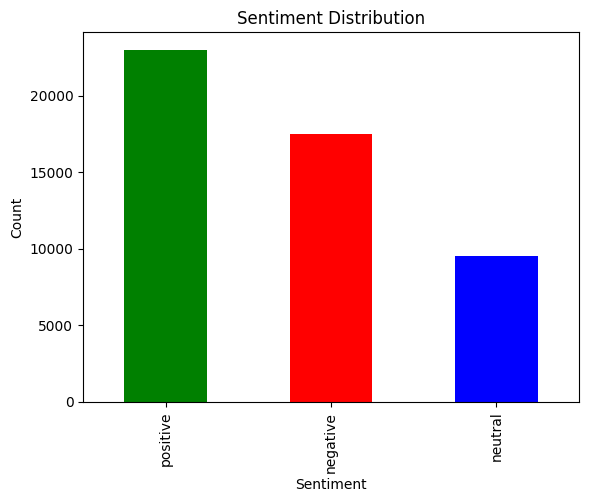

In [17]:
import matplotlib.pyplot as plt

# Plot sentiment distribution as a bar chart
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


##### **Observations**
1.  Positive sentiments: the highest no. of tweets fall into positive category with over 20000 occurance indicating that most tweets express favorable opinions or emotions
2.  negative Sentimen: Around  15000 tweets reflects unfavourable sentiment
3. Neutral sentiment : Smallest category with fewer tahn 1000 tweets


### **Highlight Most Positive and Negative Tweets**

In [18]:
# Get the most positive and most negative tweets
most_positive_tweet = data.loc[data['Sentiment_Score'].idxmax()]
most_negative_tweet = data.loc[data['Sentiment_Score'].idxmin()]

In [19]:
print("Most Positive Tweet:")
print(most_positive_tweet['Cleaned_Tweet'])

Most Positive Tweet:
Gujarat may AAP ki sarkar banane ja rahi hai A tectonic shift in Indian politicsfor the better A win for good govt schools A win for good public health care A win for door step delivery of govt services A win for job creation for youth A win for corruption free govt


In [20]:
print("\nMost Negative Tweet:")
print(most_negative_tweet['Cleaned_Tweet'])


Most Negative Tweet:
Rainbow devils speak for no one but for themselves We dont claim to be Indian devils Asian Devils American devils blind devils straight devils Deaf devils and stuff Lgbtq can stay out of football especially from our clubEveryone is just FANS here not politics


### **Creating Word clouds for Positive and Negative Tweets**

In [22]:
# Filter positive and negative tweets
positive_tweets = ' '.join(data[data['Sentiment'] == 'positive']['Cleaned_Tweet'])
negative_tweets = ' '.join(data[data['Sentiment'] == 'negative']['Cleaned_Tweet'])

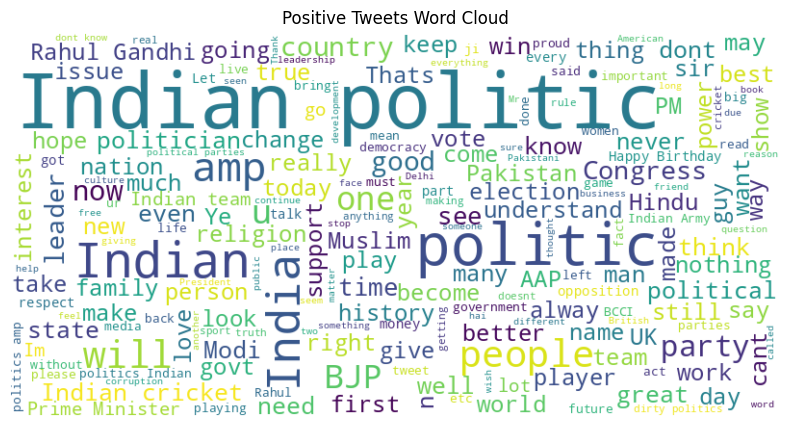

In [23]:
# Generating word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_tweets)

# Plot word clouds for Positive tweets
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets Word Cloud')
plt.show()

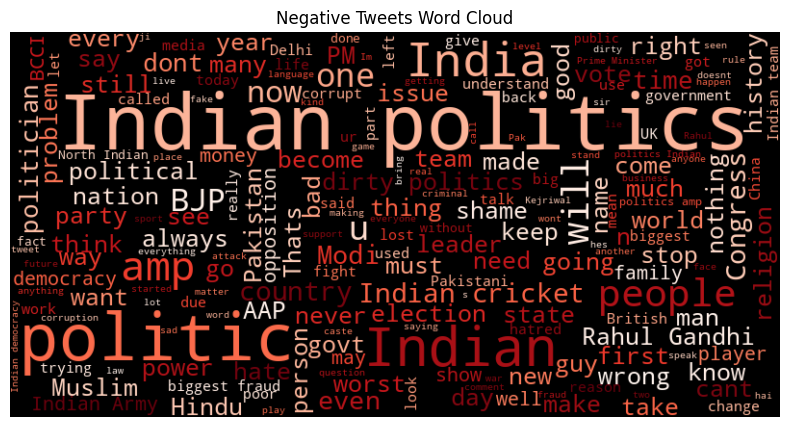

In [24]:
# ploting word cloud for negative words
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets Word Cloud')
plt.show()

### **Compare Predictions with Actual Labels**

In [31]:
# Example tweets
example_tweets = ["PM Narendra Modi’s initiatives have been widely praised for promoting economic growth and innovation in India, making the nation a global leader in technology and development.",
                  "India’s progress in renewable energy under the current government reflects a commitment to sustainability and a brighter future for all its citizens.",
                  "International forums have commended PM Modi's focus on infrastructure and digital transformation, paving the way for India's global prominence.",
                  "Efforts like the Pradhan Mantri Awas Yojana have been instrumental in improving housing and empowering marginalized communities across India."
                  ,"The government’s outreach programs and diplomatic relations have strengthened India's position as a peace-loving and inclusive nation in the global arena."]

# Clean the example tweets
example_tweets_cleaned = [clean_tweet(tweet) for tweet in example_tweets]

# Predict sentiment for the example tweets
example_sentiments = [(tweet, sia.polarity_scores(tweet)['compound']) for tweet in example_tweets_cleaned]

# Display results
for tweet, sentiment_score in example_sentiments:
    sentiment = 'positive' if sentiment_score > 0.05 else 'negative' if sentiment_score < -0.05 else 'neutral'
    print(f"Tweet: {tweet}\nPredicted Sentiment: {sentiment} (Score: {sentiment_score})\n")


Tweet: PM Narendra Modis initiatives have been widely praised for promoting economic growth and innovation in India making the nation a global leader in technology and development
Predicted Sentiment: positive (Score: 0.872)

Tweet: Indias progress in renewable energy under the current government reflects a commitment to sustainability and a brighter future for all its citizens
Predicted Sentiment: positive (Score: 0.8442)

Tweet: International forums have commended PM Modis focus on infrastructure and digital transformation paving the way for Indias global prominence
Predicted Sentiment: positive (Score: 0.4404)

Tweet: Efforts like the Pradhan Mantri Awas Yojana have been instrumental in improving housing and empowering marginalized communities across India
Predicted Sentiment: positive (Score: 0.6486)

Tweet: The governments outreach programs and diplomatic relations have strengthened Indias position as a peaceloving and inclusive nation in the global arena
Predicted Sentiment: posi

### **Summary of the Project**
1. **Data Cleaning:**
-  We cleaned the tweets by removing unnecessary elements like links, special characters, Spaces and numbers that don't affect the sentiment

2. **Sentiment Analysis:**  
- Used VADER Sentiment Analyzer to calculate a sentiment score for each tweets
- Based on the compund scores we classfied each tweet as positive, neagtive or neutral

3. **Sentiment Distribution:**
- We visualized the overall sentiment distribution in the dataset using a bar chart, which showed that most tweets were positive, followed by negative and neutral tweets.

4. **Identifying Extreme Sentiments:**
- We identified the most positive and most negative tweets based on their sentiment scores. This helped highlight tweets with the strongest positive and negative emotions.

5. **Word Cloud Visualization:**
- We generated word clouds to visualize the most common words in positive and negative tweets.
-  The size of each word in the word cloud reflects how frequently it appeared in the tweets.

6. **Sentiment Prediction and Example Tweets:**
- We tested the sentiment analysis model by inputting a few example tweets that expressed positive views on governance and development in India.
- The model correctly predicted all these tweets as positive, with high sentiment scores (indicating strong positivity).